<a href="https://colab.research.google.com/github/honyango/Analog-World-Clock/blob/master/Copy_of_Plant_Disease_Analysis%20Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING DATASET AND DATASET OVERVIEW CHAPTER 1

Mount Google Drive and Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

DATASET_PATH = "/content/drive/MyDrive/Alzheimers Detection Dataset/Plant Disease Analysis Dataset"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
import numpy as np

Data Generators

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 28589 images belonging to 23 classes.
Found 7136 images belonging to 23 classes.


Model Architecture

In [6]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 23)             │         2,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,919 (9.25 MB)

 Trainable params: 166,935 (652.09 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model Training

In [9]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


Epoch 1/5
894/894 ━━━━━━━━━━━━━━━━━━━━ 2140s 2s/step - accuracy: 0.8121 - loss: 0.5678 - val_accuracy: 0.8848 - val_loss: 0.3320
Epoch 2/5
894/894 ━━━━━━━━━━━━━━━━━━━━ 2045s 2s/step - accuracy: 0.8411 - loss: 0.4755 - val_accuracy: 0.9100 - val_loss: 0.2677
Epoch 3/5
894/894 ━━━━━━━━━━━━━━━━━━━━ 1962s 2s/step - accuracy: 0.8537 - loss: 0.4326 - val_accuracy: 0.9112 - val_loss: 0.2561
Epoch 4/5
894/894 ━━━━━━━━━━━━━━━━━━━━ 2019s 2s/step - accuracy: 0.8628 - loss: 0.4088 - val_accuracy: 0.9151 - val_loss: 0.2519
Epoch 5/5
894/894 ━━━━━━━━━━━━━━━━━━━━ 1943s 2s/step - accuracy: 0.8654 - loss: 0.4005 - val_accuracy: 0.9162 - val_loss: 0.2392


Accuracy and Loss Visualization

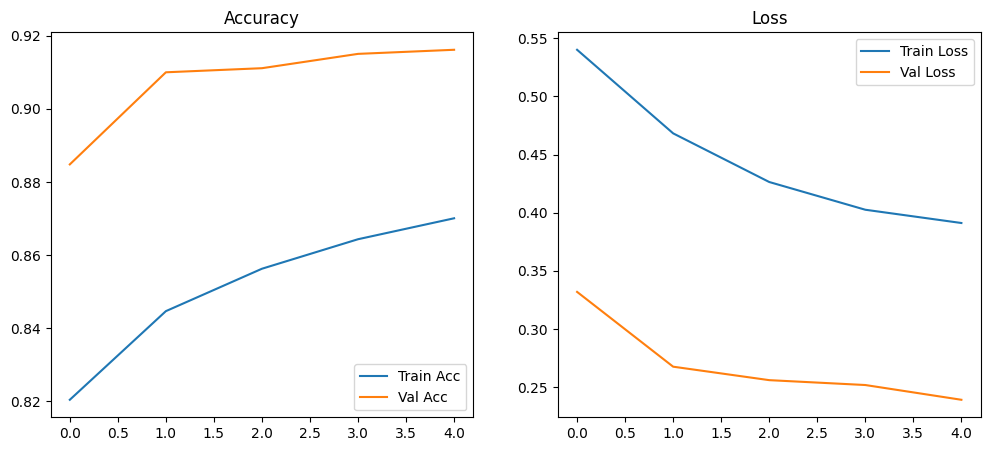

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()


Disease Prediction Example

In [61]:
from tensorflow.keras.preprocessing import image

# The file '/drive/sample_data.jpg' was not found.
# Please replace this with a path to an actual image file.
# For example, you can upload 'sample_leaf.jpg' to the Colab environment
# or use an image from your mounted Google Drive (e.g., from your DATASET_PATH).
# Example: img_path = DATASET_PATH + '/some_image_in_your_dataset.jpg'
# Example corrected: img_path = DATASET_PATH + '/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG' # <--- UPDATE THIS PATH with an actual image from your dataset
img_path = DATASET_PATH + '/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG' # Placeholder - UPDATE WITH A REAL IMAGE PATH FROM YOUR DATASET
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_idx = np.argmax(prediction)
class_name = list(train_generator.class_indices.keys())[class_idx]

print("Predicted Disease:", class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Disease: Apple___Cedar_apple_rust


In [64]:
from tensorflow.keras.preprocessing import image

# The file '/drive/sample_data.jpg' was not found.
# Please replace this with a path to an actual image file.
# For example, you can upload 'sample_leaf.jpg' to the Colab environment
# or use an image from your mounted Google Drive (e.g., from your DATASET_PATH).
# Example: img_path = DATASET_PATH + '/some_image_in_your_dataset.jpg'
# Example corrected: img_path = DATASET_PATH + '/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG' # <--- UPDATE THIS PATH with an actual image from your dataset
img_path = DATASET_PATH + '/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/00a20f6f-e8bd-4453-9e25-36ea70feb626___RS_GLSp 4655_270deg.JPG' # Placeholder - UPDATE WITH A REAL IMAGE PATH FROM YOUR DATASET
img = image.load_img(img_path, target_size=(224,224))

img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0);

prediction = model.predict(img_array)
class_idx = np.argmax(prediction)
class_name = list(train_generator.class_indices.keys())[class_idx]

print("Predicted Disease:", class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Disease: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot


In [66]:
from tensorflow.keras.preprocessing import image

# The file '/drive/sample_data.jpg' was not found.
# Please replace this with a path to an actual image file.
# For example, you can upload 'sample_leaf.jpg' to the Colab environment
# or use an image from your mounted Google Drive (e.g., from your DATASET_PATH).
# Example: img_path = DATASET_PATH + '/some_image_in_your_dataset.jpg'
# Example corrected: img_path = DATASET_PATH + '/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG' # <--- UPDATE THIS PATH with an actual image from your dataset
img_path = DATASET_PATH + '/Potato___Late_blight/02c8ff21-4e0a-4326-ba8f-089e5cb45b74___RS_LB 4089.JPG' # Placeholder - UPDATE WITH A REAL IMAGE PATH FROM YOUR DATASET
img = image.load_img(img_path, target_size=(224,224))

img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0);

prediction = model.predict(img_array)
class_idx = np.argmax(prediction)
class_name = list(train_generator.class_indices.keys())[class_idx]

print("Predicted Disease:", class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Disease: Potato___Late_blight


In [70]:
from tensorflow.keras.preprocessing import image

# The file '/drive/sample_data.jpg' was not found.
# Please replace this with a path to an actual image file.
# For example, you can upload 'sample_leaf.jpg' to the Colab environment
# or use an image from your mounted Google Drive (e.g., from your DATASET_PATH).
# Example: img_path = DATASET_PATH + '/some_image_in_your_dataset.jpg'
# Example corrected: img_path = DATASET_PATH + '/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG' # <--- UPDATE THIS PATH with an actual image from your dataset
img_path = DATASET_PATH + '/Tomato_Spider_mites_Two_spotted_spider_mite/8a0d0e70-e58d-413d-a4e3-28dc3f3100ba___Com.G_SpM_FL 8721.JPG' # Placeholder - UPDATE WITH A REAL IMAGE PATH FROM YOUR DATASET
img = image.load_img(img_path, target_size=(224,224))

img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0);

prediction = model.predict(img_array)
class_idx = np.argmax(prediction)
class_name = list(train_generator.class_indices.keys())[class_idx]

print("Predicted Disease:", class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Disease: Tomato_Spider_mites_Two_spotted_spider_mite


In [68]:
from tensorflow.keras.preprocessing import image

# The file '/drive/sample_data.jpg' was not found.
# Please replace this with a path to an actual image file.
# For example, you can upload 'sample_leaf.jpg' to the Colab environment
# or use an image from your mounted Google Drive (e.g., from your DATASET_PATH).
# Example: img_path = DATASET_PATH + '/some_image_in_your_dataset.jpg'
# Example corrected: img_path = DATASET_PATH + '/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG' # <--- UPDATE THIS PATH with an actual image from your dataset
img_path = DATASET_PATH + '/Tomato_Bacterial_spot/16119e7a-b9d7-4004-9a07-45b6c9f6d480___UF.GRC_BS_Lab Leaf 9172.JPG' # Placeholder - UPDATE WITH A REAL IMAGE PATH FROM YOUR DATASET
img = image.load_img(img_path, target_size=(224,224))

img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0);

prediction = model.predict(img_array)
class_idx = np.argmax(prediction)
class_name = list(train_generator.class_indices.keys())[class_idx]

print("Predicted Disease:", class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted Disease: Tomato_Early_blight


In [72]:
from tensorflow.keras.preprocessing import image

# The file '/drive/sample_data.jpg' was not found.
# Please replace this with a path to an actual image file.
# For example, you can upload 'sample_leaf.jpg' to the Colab environment
# or use an image from your mounted Google Drive (e.g., from your DATASET_PATH).
# Example: img_path = DATASET_PATH + '/some_image_in_your_dataset.jpg'
# Example corrected: img_path = DATASET_PATH + '/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG' # <--- UPDATE THIS PATH with an actual image from your dataset
img_path = DATASET_PATH + '/Tomato_healthy/0fee8af3-ca03-418c-a71c-c4fb0a80dc7b___RS_HL 0199.JPG' # Placeholder - UPDATE WITH A REAL IMAGE PATH FROM YOUR DATASET
img = image.load_img(img_path, target_size=(224,224))

img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0);

prediction = model.predict(img_array)
class_idx = np.argmax(prediction)
class_name = list(train_generator.class_indices.keys())[class_idx]

print("Predicted Disease:", class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Disease: Tomato_healthy


In [ ]:
ls -F '/content/drive/MyDrive/Alzheimers Detection Dataset/Plant Disease Analysis Dataset/'

 Apple___Apple_scab/
 Apple___Black_rot/
 Apple___Cedar_apple_rust/
 Apple___healthy/
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'/
'Corn_(maize)___Common_rust_'/
'Corn_(maize)___healthy'/
'Corn_(maize)___Northern_Leaf_Blight'/
 Pepper__bell___Bacterial_spot/
 Pepper__bell___healthy/
 Potato___Early_blight/
 Potato___healthy/
 Potato___Late_blight/
 Tomato_Bacterial_spot/
 Tomato_Early_blight/
 Tomato_healthy/
 Tomato_Late_blight/
 Tomato_Leaf_Mold/
 Tomato_Septoria_leaf_spot/
 Tomato_Spider_mites_Two_spotted_spider_mite/
 Tomato__Target_Spot/
 Tomato__Tomato_mosaic_virus/
 Tomato__Tomato_YellowLeaf__Curl_Virus/


In [58]:
ls -F '/content/drive/MyDrive/Alzheimers Detection Dataset/Plant Disease Analysis Dataset/'

 Apple___Apple_scab/
 Apple___Black_rot/
 Apple___Cedar_apple_rust/
 Apple___healthy/
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'/
'Corn_(maize)___Common_rust_'/
'Corn_(maize)___healthy'/
'Corn_(maize)___Northern_Leaf_Blight'/
 Pepper__bell___Bacterial_spot/
 Pepper__bell___healthy/
 Potato___Early_blight/
 Potato___healthy/
 Potato___Late_blight/
 Tomato_Bacterial_spot/
 Tomato_Early_blight/
 Tomato_healthy/
 Tomato_Late_blight/
 Tomato_Leaf_Mold/
 Tomato_Septoria_leaf_spot/
 Tomato_Spider_mites_Two_spotted_spider_mite/
 Tomato__Target_Spot/
 Tomato__Tomato_mosaic_virus/
 Tomato__Tomato_YellowLeaf__Curl_Virus/


In [13]:
ls -F /content/

drive/  sample_data/


22

Q2

Literature Review and Methodology

Code for Training

In [17]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Generator

In [19]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = data_gen.flow_from_directory(
    DATASET_PATH, # Use the predefined DATASET_PATH
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    DATASET_PATH, # Use the predefined DATASET_PATH
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 28589 images belonging to 23 classes.
Found 7136 images belonging to 23 classes.


Model Construction

In [21]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model Evaluation

Training

Accuracy and Loss Visualization

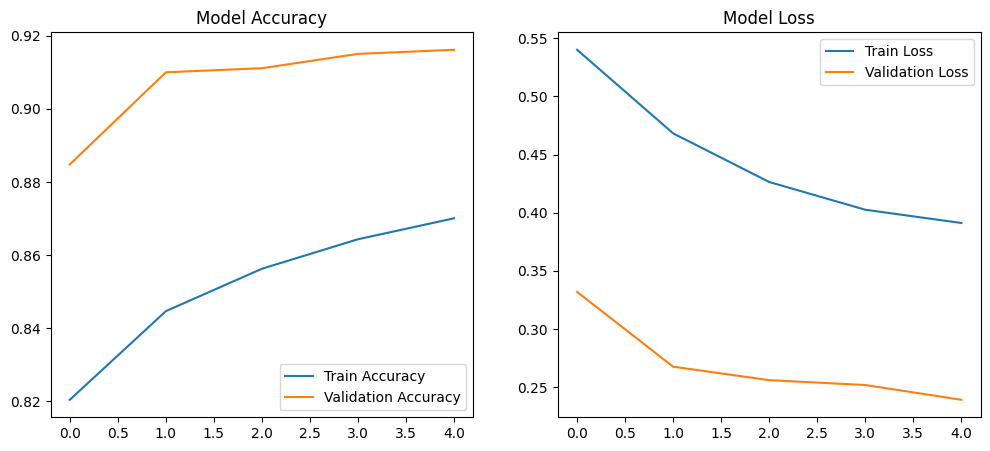

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


Q3

3. Problem Formulation

Image Processing and Label Definition

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = data_generator.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_generator.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print("Number of Disease Classes:", train_data.num_classes)


Found 28589 images belonging to 23 classes.
Found 7136 images belonging to 23 classes.
Number of Disease Classes: 23


Model Mapping Input to disease Label

In [24]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Training and Automated Disease Classisfier

In [25]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


Epoch 1/10


KeyboardInterrupt: 

Disease Verification via Prediction

In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = "/content/sample_leaf.jpg"  # test image
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

class_labels = list(train_data.class_indices.keys())
print("Predicted Disease:", class_labels[predicted_class])


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_leaf.jpg'

Training Loops Grk

Confusion Matrix and Sample Prediction

In [57]:
# The previous code attempted to use PyTorch-specific methods (.train(), .eval(), etc.)
# on a TensorFlow Keras model, leading to an AttributeError.
# Keras models are trained using the `model.fit()` method.

# Re-compile the model just in case, though it was already compiled in x7t5z1myWVZ7
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

num_epochs = 5

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=num_epochs
)

# Extract history for visualization, similar to the variables used in the original loop
train_losses = history.history['loss']
val_losses = history.history['val_loss']
train_accs = history.history['accuracy']
val_accs = history.history['val_accuracy']

# You can print the final epoch's stats or a summary
print(f'Training finished. Last Epoch - Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accs[-1]:.2f}%, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accs[-1]:.2f}%')

Epoch 1/5
894/894 ━━━━━━━━━━━━━━━━━━━━ 1949s 2s/step - accuracy: 0.5906 - loss: 1.3751 - val_accuracy: 0.8729 - val_loss: 0.3837
Epoch 2/5
894/894 ━━━━━━━━━━━━━━━━━━━━ 1934s 2s/step - accuracy: 0.8161 - loss: 0.5570 - val_accuracy: 0.9005 - val_loss: 0.2959
Epoch 3/5
894/894 ━━━━━━━━━━━━━━━━━━━━ 1981s 2s/step - accuracy: 0.8458 - loss: 0.4653 - val_accuracy: 0.9072 - val_loss: 0.2720
Epoch 4/5
894/894 ━━━━━━━━━━━━━━━━━━━━ 1955s 2s/step - accuracy: 0.8611 - loss: 0.4150 - val_accuracy: 0.9100 - val_loss: 0.2631
Epoch 5/5
894/894 ━━━━━━━━━━━━━━━━━━━━ 1945s 2s/step - accuracy: 0.8683 - loss: 0.3897 - val_accuracy: 0.9071 - val_loss: 0.2648
Training finished. Last Epoch - Train Loss: 0.3883, Train Acc: 0.87%, Val Loss: 0.2648, Val Acc: 0.91%


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


223/223 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step

Generating Confusion Matrix...


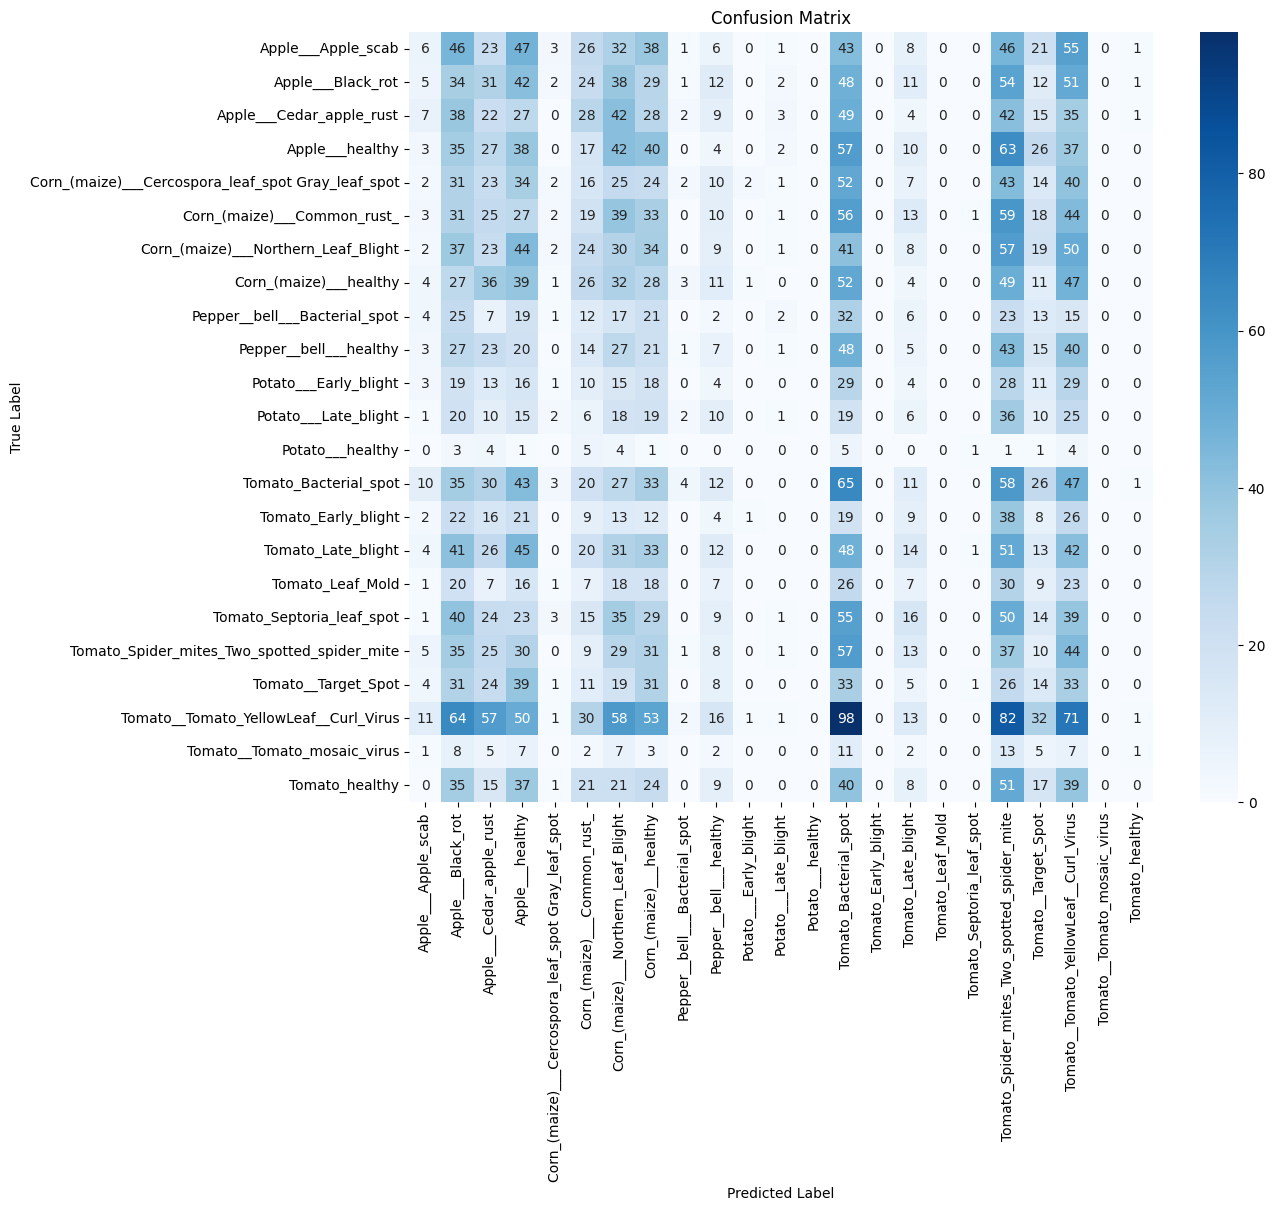


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.07      0.01      0.02       403
                                 Apple___Black_rot       0.05      0.09      0.06       397
                          Apple___Cedar_apple_rust       0.04      0.06      0.05       352
                                   Apple___healthy       0.06      0.09      0.07       401
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.08      0.01      0.01       328
                       Corn_(maize)___Common_rust_       0.05      0.05      0.05       381
               Corn_(maize)___Northern_Leaf_Blight       0.05      0.08      0.06       381
                            Corn_(maize)___healthy       0.05      0.08      0.06       371
                     Pepper__bell___Bacterial_spot       0.00      0.00      0.00       199
                            Pepper__bell___healthy     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: Pepper__bell___healthy, Actual: Pepper__bell___healthy


In [30]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
import random

# --- Evaluation on Validation Data ---
# Reset the validation generator to ensure predictions are made from the start
val_data.reset()

# Generate predictions for the entire validation set
predictions = model.predict(val_data)

# Get the predicted class index for each sample
y_pred = np.argmax(predictions, axis=1)

# Get true labels from the generator
# val_data.classes holds the integer labels of the images in the validation set in file order
y_true = val_data.classes

# Get class names from the generator
class_names = list(val_data.class_indices.keys())

# --- Confusion Matrix ---
print("\nGenerating Confusion Matrix...")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# --- Sample Prediction on a Test Image ---
print("\nPerforming sample prediction...")

# Get a list of all file paths in the validation set
val_filepaths = val_data.filepaths

if val_filepaths:
    # Choose a random image from the validation set for prediction
    sample_img_path = random.choice(val_filepaths)

    print(f"Predicting on sample image: {sample_img_path}")

    # Load and preprocess the image
    img = image.load_img(sample_img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class_idx = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class_idx]

    # Get the actual class name for the sample image
    true_class_idx = val_data.labels[val_filepaths.index(sample_img_path)]
    actual_class_name = class_names[true_class_idx]

    print(f'Predicted: {predicted_class_name}, Actual: {actual_class_name}')
else:
    print("No validation file paths found to perform a sample prediction.")

Q4 Chapter 1

Dataset Preparation

Mount Google Drive & Define Dataset Path

In [35]:
from google.colab import drive
drive.mount('/content/drive')

# Corrected DATASET_PATH to the location used in previous successful runs
DATASET_PATH = "/content/drive/MyDrive/Alzheimers Detection Dataset/Plant Disease Analysis Dataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


5 Model Architecture

Import Required Libraries

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Data Preprocessing and Augmentation

In [33]:
image_generator = ImageDataGenerator(
    rescale=1./255,          # Normalization
    validation_split=0.2,    # 80–20 split
    rotation_range=20,       # Data augmentation
    zoom_range=0.2,
    horizontal_flip=True
)


Training Dataset Loader

In [36]:
train_data = image_generator.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 28589 images belonging to 23 classes.


Validation Dataset Loader

In [37]:
validation_data = image_generator.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 7136 images belonging to 23 classes.


Dataset Verification

In [38]:
print("Total number of classes:", train_data.num_classes)
print("Class labels:")
for label in train_data.class_indices:
    print(label)


Total number of classes: 23
Class labels:
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Pepper__bell___Bacterial_spot
Pepper__bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_Late_blight
Tomato_Leaf_Mold
Tomato_Septoria_leaf_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato__Target_Spot
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato__Tomato_mosaic_virus
Tomato_healthy


DATASET PREPARATION CODE GROK ASIDE

In [39]:
# Mount Google Drive to access the dataset (assuming it's uploaded there)
from google.colab import drive
drive.mount('/content/drive')

import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

# Define data transformations for preprocessing and augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.RandomHorizontalFlip(),  # Augmentation: random flip
    transforms.RandomRotation(10),  # Augmentation: random rotation up to 10 degrees
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

# Load the dataset from the directory
data_dir = '/content/drive/MyDrive/Alzheimers Detection Dataset/Plant Disease Analysis Dataset'  # Path to the dataset folder
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Get class names and count (38 classes)
class_names = dataset.classes
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")

# Calculate split sizes
total_samples = len(dataset)
train_size = int(0.8 * total_samples)  # 80% for training
val_size = int(0.1 * total_samples)  # 10% for validation
test_size = total_samples - train_size - val_size  # Remaining 10% for testing

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

print(f"Training samples: {len(train_dataset)}, Validation samples: {len(val_dataset)}, Test samples: {len(test_dataset)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of classes: 23
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Training samples: 28580, Validation samples: 3572, Test samples: 3573


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


555

Model Architecture Implementation Chapter 2

Import Required Models

In [40]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential


Define Base Model

In [41]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False


Build Full Model

In [42]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])


Compile model

In [43]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Model Summary

In [44]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 23)             │         2,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,919 (9.25 MB)

 Trainable params: 166,935 (652.09 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Implementation Chapter 2

Data Pipeline

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = data_gen.flow_from_directory(
    DATASET_PATH,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    DATASET_PATH,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 28589 images belonging to 23 classes.
Found 7136 images belonging to 23 classes.


Model Defination

In [46]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])


Training Code

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


Epoch 1/5
 61/894 ━━━━━━━━━━━━━━━━━━━━ 24:35 2s/step - accuracy: 0.8642 - loss: 0.4139

Prediction Code

In [53]:
import numpy as np
from tensorflow.keras.preprocessing import image

# The file 'sample_leaf.jpg' was not found.
# Please replace this with a path to an actual image file.
# For example, you can upload 'sample_leaf.jpg' to the Colab environment
# or use an image from your mounted Google Drive (e.g., from your DATASET_PATH).
# Example: img_path = DATASET_PATH + '/some_image_in_your_dataset.jpg'
img_path = DATASET_PATH + '/some_image_from_your_dataset.jpg'  # <--- UPDATE THIS PATH with an actual image from your dataset
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

class_names = list(train_data.class_indices.keys())
print("Predicted Disease:", class_names[predicted_class])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Alzheimers Detection Dataset/Plant Disease Analysis Dataset/some_image_from_your_dataset.jpg'

Model Evaluation Chapter 2 c

Evaluation Metrics
Generate Predictions on Validation Data

In [54]:
import numpy as np

val_data.reset()
predictions = model.predict(val_data)
y_pred = np.argmax(predictions, axis=1)
y_true = val_data.classes


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


223/223 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step


Classification Report (Precision, Recall, F1-score)

In [55]:
from sklearn.metrics import classification_report

class_names = list(val_data.class_indices.keys())

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.04      0.06      0.05       403
                                 Apple___Black_rot       0.05      0.22      0.08       397
                          Apple___Cedar_apple_rust       0.00      0.00      0.00       352
                                   Apple___healthy       0.00      0.00      0.00       401
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.04      0.03      0.04       328
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       381
               Corn_(maize)___Northern_Leaf_Blight       0.04      0.02      0.02       381
                            Corn_(maize)___healthy       0.09      0.02      0.04       371
                     Pepper__bell___Bacterial_spot       0.03      0.04      0.03       199
                            Pepper__bell___healthy       0.00      0.00      0.

Confusion Matrix Code

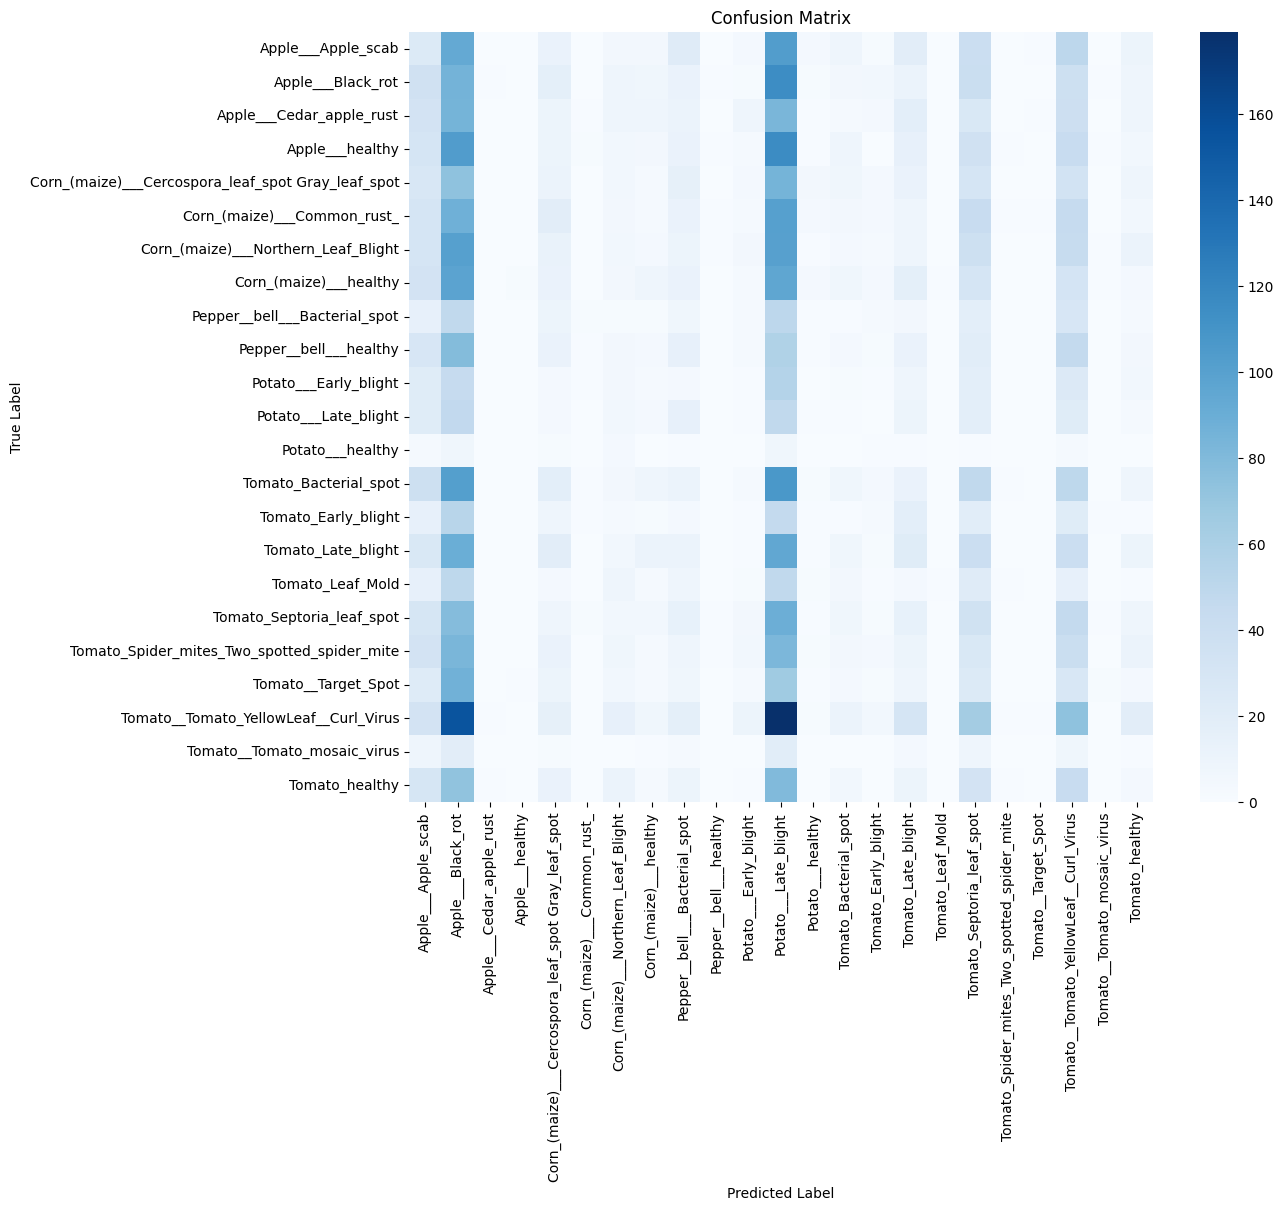

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, xticklabels=class_names, yticklabels=class_names,
            annot=False, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
